<a href="https://colab.research.google.com/github/FIKENYE/Personal-Projects/blob/main/Martingale_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

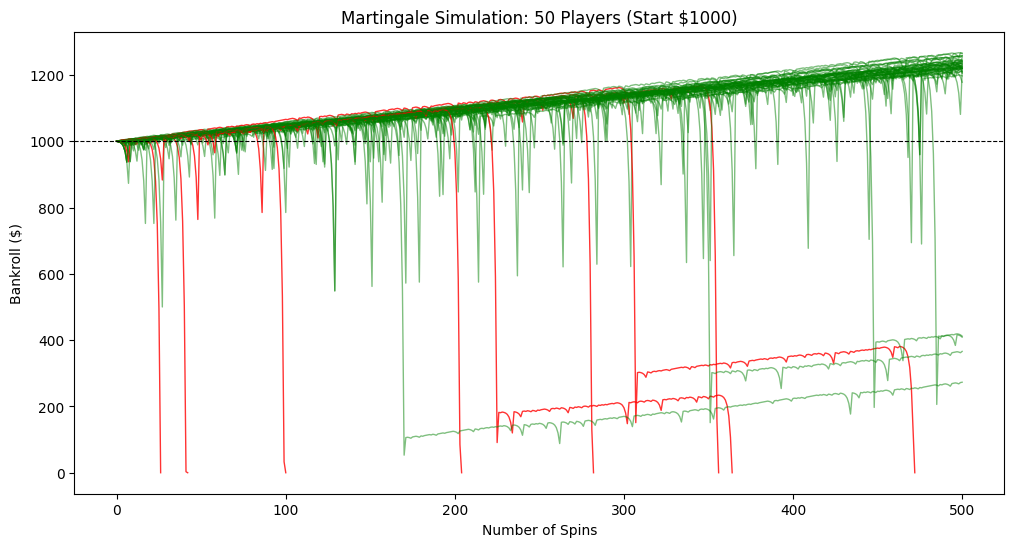

In [ ]:
import random
import matplotlib.pyplot as plt

def spin_wheel():
    """
    American Roulette: 18 Red, 18 Black, 2 Green (0, 00).
    Odds of winning on Red = 18 / 38 (~47.37%)
    """
    pocket = random.randint(1, 38)
    if pocket <= 18:
        return 'win'  # Red
    else:
        return 'lose' # Black or Green

def play_martingale_session(start_bankroll, table_limit, max_spins):
    bankroll = start_bankroll
    history = [bankroll]
    current_bet = 1

    for _ in range(max_spins):
        if bankroll <= 0:
            break # Broke!

        # Ensure we have enough to bet, and we aren't over the table limit
        actual_bet = min(current_bet, bankroll, table_limit)

        result = spin_wheel()

        if result == 'win':
            bankroll += actual_bet
            current_bet = 1 # Reset to $1 on win
        else:
            bankroll -= actual_bet
            current_bet *= 2 # Double bet on loss

            # If the doubled bet exceeds table limit, we can't double properly next time.
            # This usually marks the beginning of the end.
            if current_bet > table_limit:
                current_bet = table_limit

        history.append(bankroll)

    return history

# --- RUNNING THE SIMULATION ---

plt.figure(figsize=(12, 6))

# Simulate 50 different gamblers
for i in range(50):
    # Everyone starts with $1,000
    # Max bet allowed is $500 (Table Limit)
    # They play 500 spins
    session = play_martingale_session(start_bankroll=1000, table_limit=500, max_spins=500)

    # Color logic: Red if they went broke, Green if they survived
    color = 'red' if session[-1] <= 100 else 'green'
    alpha = 0.5 if color == 'green' else 0.8

    plt.plot(session, color=color, linewidth=1, alpha=alpha)

plt.title('Martingale Simulation: 50 Players (Start $1000)')
plt.xlabel('Number of Spins')
plt.ylabel('Bankroll ($)')
plt.axhline(1000, color='black', linestyle='--', linewidth=0.8)
plt.show()